<a href="https://colab.research.google.com/github/cerensenol/DSA-210-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving path_to_crime_dataset.csv to path_to_crime_dataset.csv


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("path_to_crime_dataset.csv")

df['MHClient_per_100k'] = (df['MHClients'] / df['Population']) * 100000
df['Log_CrimeRate'] = np.log(df['ViolentCrimePer100k'])

df.head()

,State,AMI%,SMI%,DrugUse%,ViolentCrimePer100k,FacilitiesCount,MHClients,Population,Facilities_per_100k,MHClient_per_100k,Log_CrimeRate
0,Alaska,25.2,6.8,17.5,837,54,6000,733391,7.36,818.117484,6.729824
1,California,20.5,4.8,15.0,442,630,50000,39538223,1.59,126.459907,6.091310
2,Florida,19.3,4.1,14.2,384,420,43000,21538187,1.95,199.645402,5.950643
3,New Mexico,22.1,5.6,18.9,778,73,7800,2117522,3.45,368.355087,6.656727
4,Oregon,26.7,7.2,19.1,292,110,10500,4237256,2.60,247.801879,5.676754


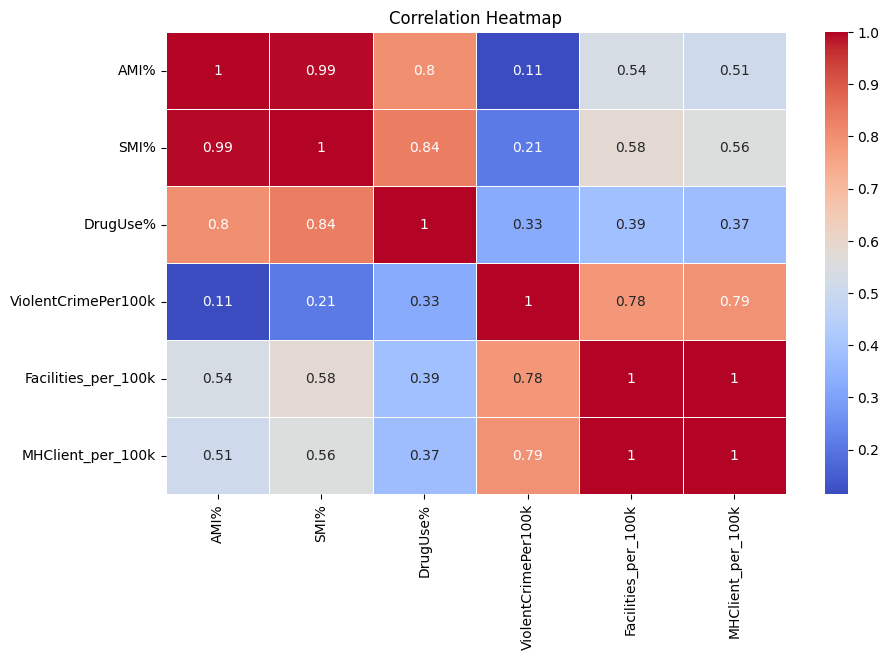

In [8]:
plt.figure(figsize=(10, 6))
corr = df[['AMI%', 'SMI%', 'DrugUse%', 'ViolentCrimePer100k', 'Facilities_per_100k', 'MHClient_per_100k']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

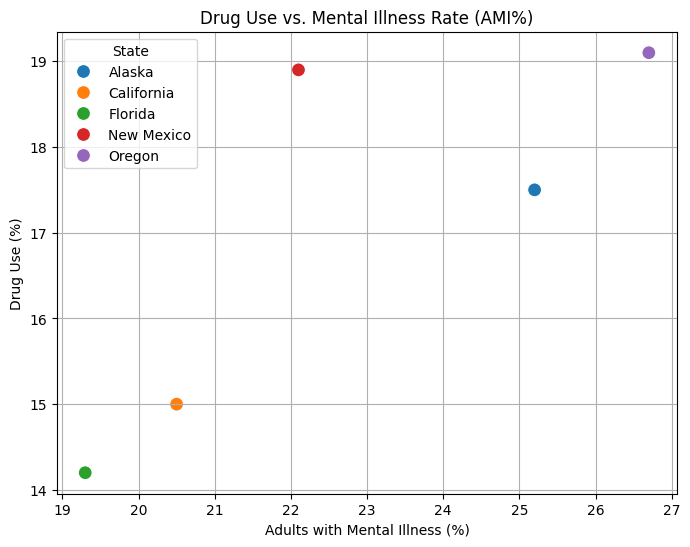

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='AMI%', y='DrugUse%', hue='State', s=100)
plt.title('Drug Use vs. Mental Illness Rate (AMI%)')
plt.xlabel('Adults with Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.show()

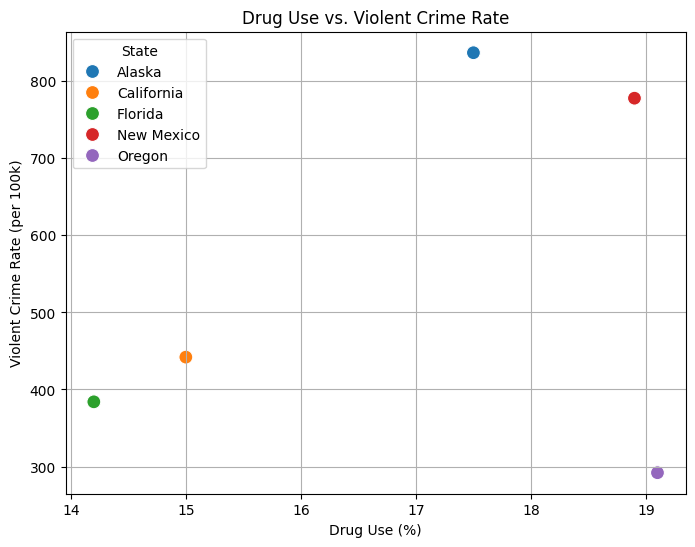

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='DrugUse%', y='ViolentCrimePer100k', hue='State', s=100)
plt.title('Drug Use vs. Violent Crime Rate')
plt.xlabel('Drug Use (%)')
plt.ylabel('Violent Crime Rate (per 100k)')
plt.grid(True)
plt.show()

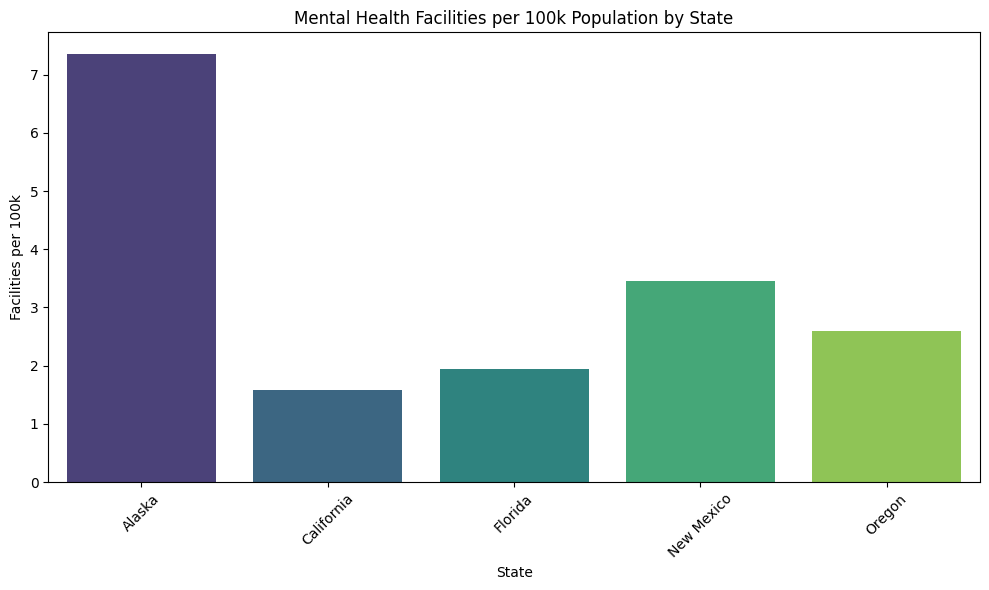

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Facilities_per_100k', data=df, hue='State', palette='viridis', dodge=False, legend=False)
plt.title('Mental Health Facilities per 100k Population by State')
plt.xlabel('State')
plt.ylabel('Facilities per 100k')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Hypothesis 1: Higher rates of undiagnosed mental illnesses are connected with increased use of drugs and this in turn contributes to higher crime rates.

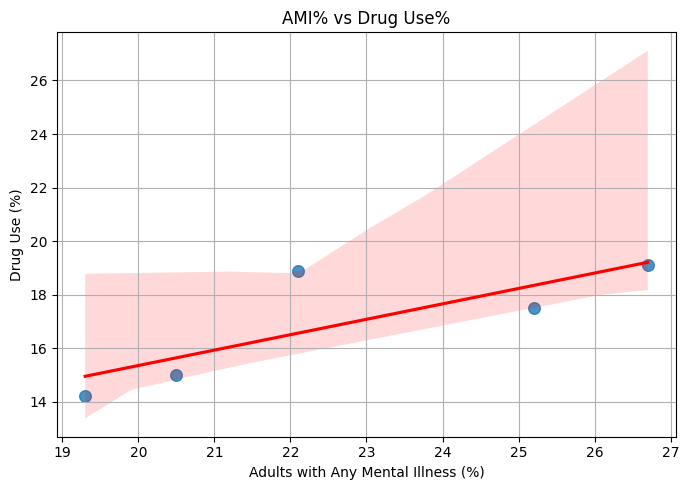

In [14]:
plt.figure(figsize=(7, 5))
sns.regplot(x='AMI%', y='DrugUse%', data=df, scatter_kws={"s": 70}, line_kws={"color": "red"})
plt.title('AMI% vs Drug Use%')
plt.xlabel('Adults with Any Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

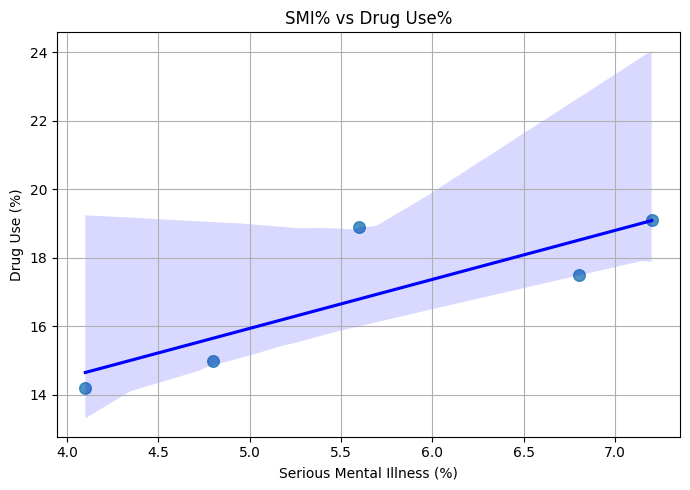

In [15]:
plt.figure(figsize=(7, 5))
sns.regplot(x='SMI%', y='DrugUse%', data=df, scatter_kws={"s": 70}, line_kws={"color": "blue"})
plt.title('SMI% vs Drug Use%')
plt.xlabel('Serious Mental Illness (%)')
plt.ylabel('Drug Use (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

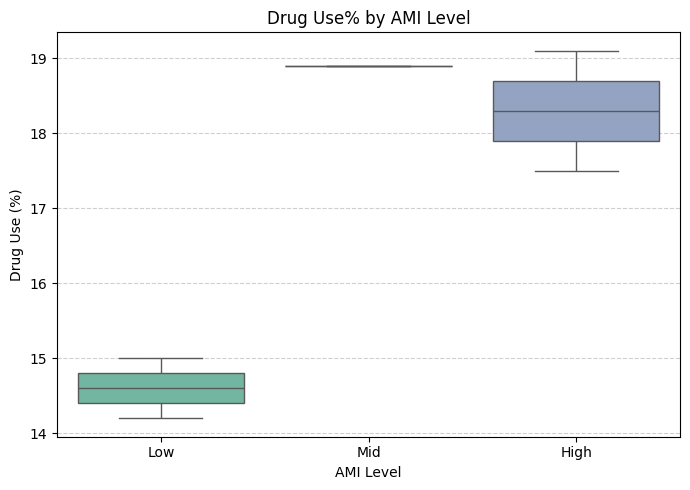

In [18]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    x='AMI_Level',
    y='DrugUse%',
    hue='AMI_Level',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Drug Use% by AMI Level')
plt.xlabel('AMI Level')
plt.ylabel('Drug Use (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [19]:
# Hypothesis 2: Areas with limited access to mental health services have significantly higher drug use rates.

In [20]:
from scipy.stats import ttest_ind

threshold = df['Facilities_per_100k'].mean()
high_access = df[df['Facilities_per_100k'] >= threshold]['DrugUse%']
low_access = df[df['Facilities_per_100k'] < threshold]['DrugUse%']

t_stat, p_val = ttest_ind(high_access, low_access)

print("T-test Result: Service Access → Drug Use")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

T-test Result: Service Access → Drug Use
T-statistic: 1.04
P-value: 0.3765


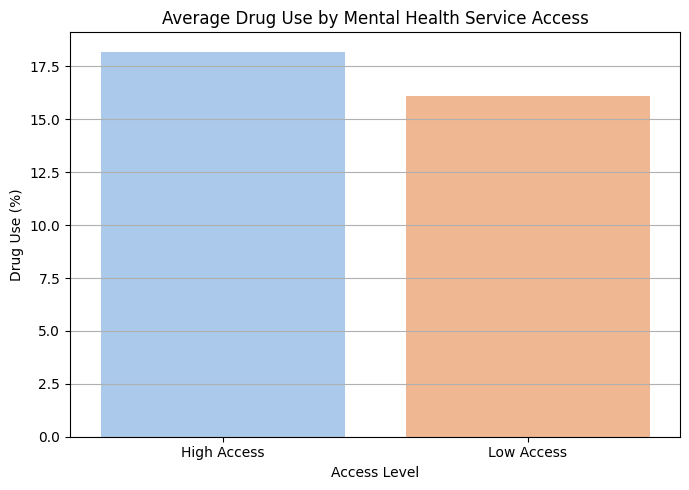

In [22]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=df,
    x='AccessLevel',
    y='DrugUse%',
    hue='AccessLevel',
    palette='pastel',
    dodge=False,
    legend=False,
    errorbar=None  # ci yerine
)
plt.title("Average Drug Use by Mental Health Service Access")
plt.xlabel("Access Level")
plt.ylabel("Drug Use (%)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

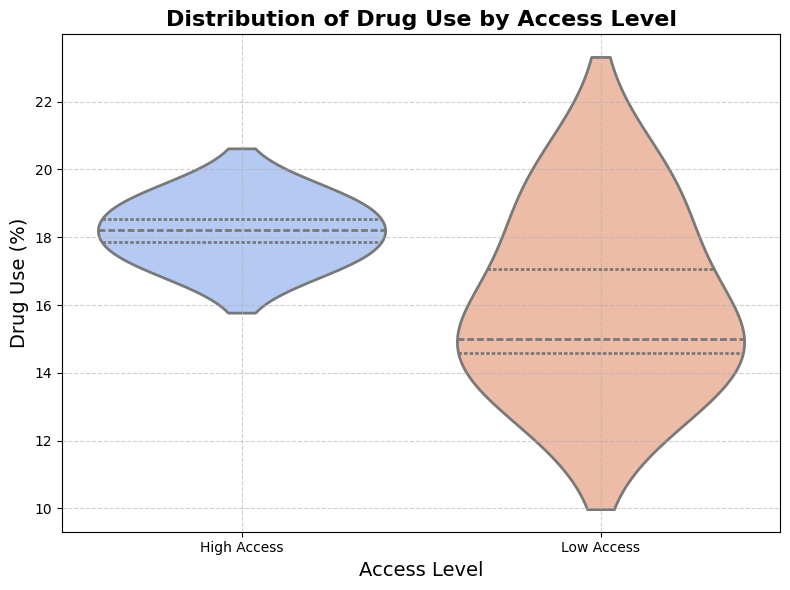

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='AccessLevel',
    y='DrugUse%',
    hue='AccessLevel',
    palette='coolwarm',
    inner='quartile',
    linewidth=2,
    dodge=False,
    legend=False
)
plt.title('Distribution of Drug Use by Access Level', fontsize=16, fontweight='bold')
plt.xlabel('Access Level', fontsize=14)
plt.ylabel('Drug Use (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [24]:
# Hypothesis 3:  Individuals with severe, untreated mental health conditions are more likely to engage in criminal activity.

In [25]:
r3 = df['SMI%'].corr(df['ViolentCrimePer100k'])
print(f"Correlation (SMI% vs Violent Crime Rate): {r3:.2f}")

Correlation (SMI% vs Violent Crime Rate): 0.21


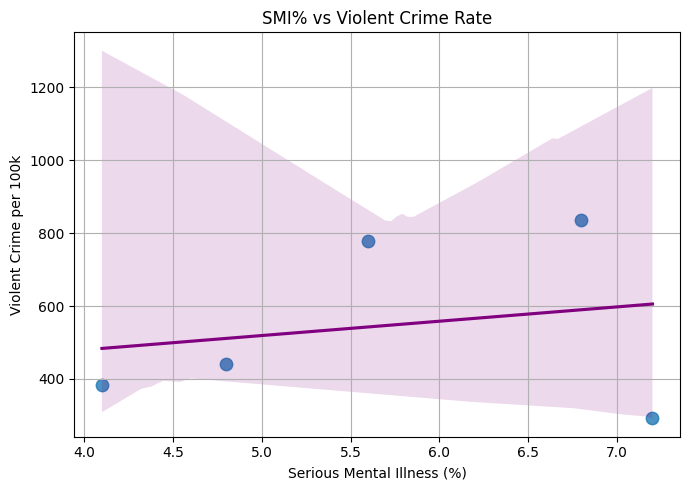

In [26]:
plt.figure(figsize=(7, 5))
sns.regplot(x='SMI%', y='ViolentCrimePer100k', data=df, scatter_kws={"s": 80}, line_kws={"color": "purple"})
plt.title('SMI% vs Violent Crime Rate')
plt.xlabel('Serious Mental Illness (%)')
plt.ylabel('Violent Crime per 100k')
plt.grid(True)
plt.tight_layout()
plt.show()

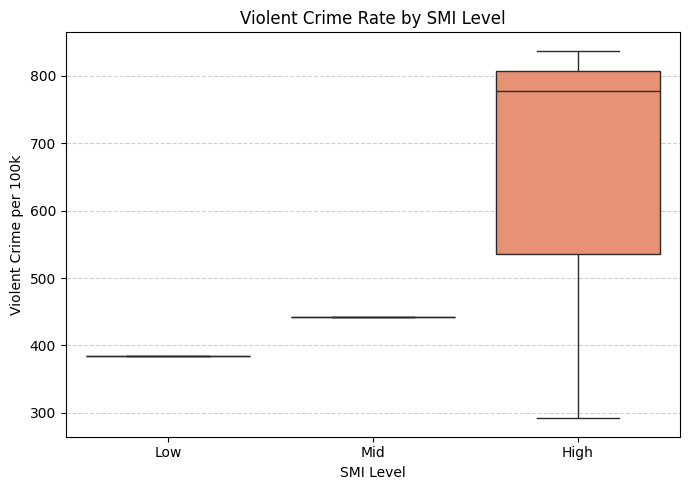

In [32]:
df['SMI_Level'] = pd.cut(df['SMI%'], bins=[0, 4.5, 5.5, 100], labels=['Low', 'Mid', 'High'])

plt.figure(figsize=(7, 5))
sns.boxplot(x='SMI_Level', y='ViolentCrimePer100k', data=df, palette='magma', hue='SMI_Level', legend=False)
plt.title('Violent Crime Rate by SMI Level')
plt.xlabel('SMI Level')
plt.ylabel('Violent Crime per 100k')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

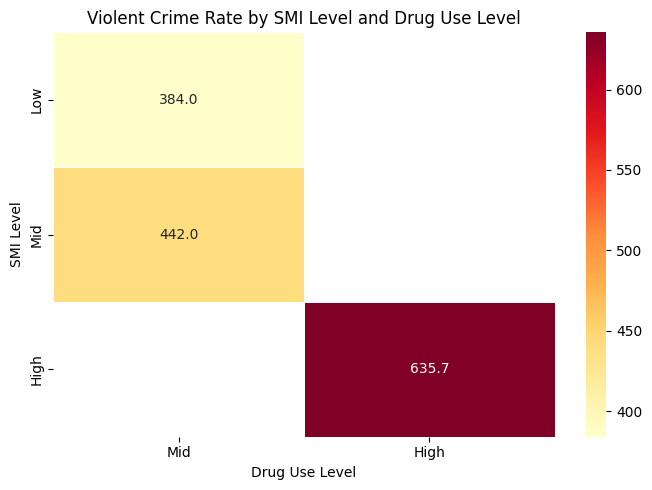

In [36]:
df['SMI_Level'] = pd.cut(df['SMI%'], bins=[0, 4.5, 5.5, 100], labels=['Low', 'Mid', 'High'])
df['DrugUse_Level'] = pd.cut(df['DrugUse%'], bins=[0, 14, 17, 100], labels=['Low', 'Mid', 'High'])

heat_data = df.pivot_table(
    values='ViolentCrimePer100k',
    index='SMI_Level',
    columns='DrugUse_Level',
    aggfunc='mean',
    observed=False
)

plt.figure(figsize=(7, 5))
sns.heatmap(heat_data, annot=True, cmap='YlOrRd', fmt='.1f', linewidths=0.5)
plt.title('Violent Crime Rate by SMI Level and Drug Use Level')
plt.xlabel('Drug Use Level')
plt.ylabel('SMI Level')
plt.tight_layout()
plt.show()